In [3]:
import pandas as pd
import scipy as scipy
import numpy as np
import matplotlib as plt
import seaborn as sns

In [1]:
pip install --upgrade pip

  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

In [127]:
data = pd.read_excel("C:/Users/user/Desktop/data 1003/taoyuan.xlsx")
print(data[data["h1"]==1].shape)
print(data[data["h2"]==1].shape)
print(data[data["h3"]==1].shape)

(764, 31)
(841, 31)
(304, 31)


In [124]:
#ltv_before1 = data[data["y4"] == 1]
cond4 = data["s2"] ==1
cond3 = data["s3"] ==1  
cond2 = data["s4"] ==1  
cond1 = data["y4"] ==1
ltv_before = data[cond1& (cond4|cond3|cond2)]
#ltv_before = pd.concat([ltv_before1, ltv_before2] ,axis =0)
print(ltv_before[ltv_before["h1"]==1].shape)
print(ltv_before[ltv_before["h2"]==1].shape)
print(ltv_before[ltv_before["h3"]==1].shape)
ltv_before.shape

(217, 31)
(219, 31)
(80, 31)


(516, 31)

In [84]:
h1_ltv = ltv_before[ltv_before["h1"]==1]
h2_ltv = ltv_before[ltv_before["h2"]==1]
h3_ltv = ltv_before[ltv_before["h3"]==1]


In [104]:
h1_ltv = data[data["h1"] == 1]
h2_ltv = data[data["h2"] == 1]
h3_ltv = data[data["h3"] == 1]


In [35]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [27]:
np.mean(h2_ltv["RATE"])

1.9879829062689431

In [114]:
kde = stats.kde.gaussian_kde(data["LTV"])
#print(kde_cdf([1.5,2,2.5,3,3.5]))
print(kde_cdf([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

[0.00158997 0.00442425 0.01604964 0.03932612 0.0917321  0.19449274
 0.41332396 0.75358619 0.94168979]


In [99]:
print(kde_cdf([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))  ###h3 after

[0.00357965 0.0081529  0.02062932 0.04843163 0.11816087 0.27242731
 0.49680094 0.79862616 0.9759158 ]


In [76]:
print(kde_cdf([1.5,2,2.5,3,3.5]))

[0.01372062 0.46592257 0.92601182 0.98690268 0.99076692]


In [34]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [8]:
import numpy as np
import statsmodels.api as sm
import scipy


In [122]:
X = data["LTV"]
kde = sm.nonparametric.KDEUnivariate(X)
kde.fit(kernel='gau', bw=0.05)

mean1 = np.dot(kde.density, kde.support) / kde.density.sum()
mean2 = scipy.integrate.quad(lambda x: kde.evaluate(x)  * x, kde.support[0], kde.support[-1])
print('TL;DR version - Mean:', mean1)
print('Integration version - Mean:', mean2)

print('TL;DR version - Variance:', np.dot(kde.density, kde.support**2) / kde.density.sum() - mean1**2)
print('Integration version - Variance:', scipy.integrate.quad(lambda x: kde.evaluate(x)  * x**2, kde.support[0], kde.support[-1])[0] - mean2[0]**2)

TL;DR version - Mean: 0.7047604050545005
Integration version - Mean: (0.7047601807180082, 9.880969178889578e-10)
TL;DR version - Variance: 0.02232401113365151
Integration version - Variance: 0.022320705328810475


In [106]:
import scipy.integrate as integrate
from scipy.integrate import quad

TypeError: 'module' object is not callable

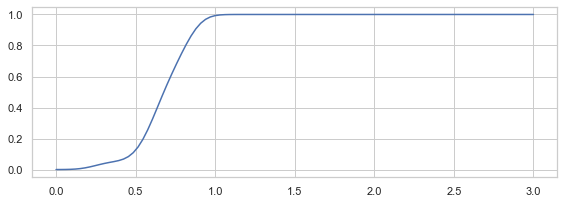

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))


x = np.linspace(0, 3, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()

In [15]:
print( kde_cdf([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))  ###h3 after

[0.00216389 0.00725304 0.02398752 0.04951135 0.10392846 0.21523936
 0.42300188 0.76964012 0.98193233]


In [113]:
print(kde_cdf([1.5,2,2.5,3])) ### h2 after

[0.00940437 0.56450944 0.96016472 0.99632114]


In [13]:
print(kde_cdf([1.5,2,2.5,3])) ### h1 after

NameError: name 'kde' is not defined

In [ ]:
print(kde_cdf([1.5,2,2.5,3]))